# NEBNext Ultra II Directional RNA Library Prep with rRNA Depletion Kit 

| Experiment:   | Illumina NovaSeq Sequencing |
|------|------|
| QC Protocols  | Agilent RNA Screen Tape Assay & Agilent High Sensitivity RNA Screen Tape Assay     |


| Lib Prep Protocols | NEBNext Ultra II Directional RNA Library Prep with rRNA Depletion Kit (human.mouse.rat) |
|------|------|
| Adopter Read 1 | AGATCGGAAGAGCACACGTCTGAACTCCAGTCA |
| Adopter Read 2 | AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG  |

In [171]:
%%bash
ls *_R[1-2]_001*

16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R1_001.fastq.gz
16207X1_190807_A00421_0097_AHCHHWDRXX_S8_L001_R2_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R1_001.fastq.gz
16207X2_190807_A00421_0097_AHCHHWDRXX_S7_L001_R2_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R1_001.fastq.gz
16207X3_190807_A00421_0097_AHCHHWDRXX_S6_L001_R2_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R1_001.fastq.gz
16207X4_190807_A00421_0097_AHCHHWDRXX_S5_L001_R2_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R1_001.fastq.gz
16207X5_190807_A00421_0097_AHCHHWDRXX_S4_L001_R2_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R1_001.fastq.gz
16207X6_190807_A00421_0097_AHCHHWDRXX_S3_L001_R2_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R1_001.fastq.gz
16207X7_190807_A00421_0097_AHCHHWDRXX_S2_L001_R2_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R1_001.fastq.gz
16207X8_190807_A00421_0097_AHCHHWDRXX_S1_L001_R2_001.fastq.gz


### Trimming task

In [ ]:
%%bash
# Trimming task
for f1 in 16207X[1-8]_190807_A00421_0097_AHCHHWDRXX_S[1-8]_L001_R1_001.fastq.gz; do
    f2=${f1/R1_001.fastq.gz/R2_001.fastq.gz};     
    out1=${f1/R1_001.fastq.gz/out1.trim.fastq.gz};     
    out2=${f2/R2_001.fastq.gz/out2.trim.fastq.gz};     
    echo cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2;
         cutadapt -j 12 -q 15 -m 20 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCA -A AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTG -o $out1 -p $out2 $f1 $f2 >> log.txt; 
done

In [172]:
%%bash
ls *trim*

16207X1_AHCHHWDRXX_S8_R1.trim.fastq.gz
16207X1_AHCHHWDRXX_S8_R2.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R1.trim.fastq.gz
16207X2_AHCHHWDRXX_S7_R2.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R1.trim.fastq.gz
16207X3_AHCHHWDRXX_S6_R2.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R1.trim.fastq.gz
16207X4_AHCHHWDRXX_S5_R2.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R1.trim.fastq.gz
16207X5_AHCHHWDRXX_S4_R2.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R1.trim.fastq.gz
16207X6_AHCHHWDRXX_S3_R2.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R1.trim.fastq.gz
16207X7_AHCHHWDRXX_S2_R2.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R1.trim.fastq.gz
16207X8_AHCHHWDRXX_S1_R2.trim.fastq.gz


### Alignment task

In [ ]:
%%bash
for f1 in *_R1.trim.fastq.gz; do
    f2=${f1/_R1.trim.fastq.gz/_R2.trim.fastq.gz};     
	out=${f1/_R1.trim.fastq.gz/_}   
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 8 --sjdbGTFfile /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf --genomeDir /rumi/shams/genomes/mm10 --readFilesIn $f1 $f2 --outFileNamePrefix $out
done&

In [173]:
%%bash
ls *out.bam

16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam
16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam
16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam
16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam
16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam
16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam
16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam
16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam


### Measure counts

In [ ]:
%%bash
for f in *.out.bam; do
    out=${f/_AHCHHWDRXX_S[1-8]_Aligned.sortedByCoord.out.bam/.gene.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/genomes/mm10/mm10_ensemble_genes.gtf -o $out $f;
done

In [175]:
%%bash
ls *.gene.fc 

16207X1.gene.fc
16207X2.gene.fc
16207X3.gene.fc
16207X4.gene.fc
16207X5.gene.fc
16207X6.gene.fc
16207X7.gene.fc
16207X8.gene.fc


### Load R

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(DESeq2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(gridExtra, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [5]:
%%R
files <- list.files(pattern="gene.fc$") 

cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
cond <- paste(cell.line, sample.type, sep="_")
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
f_name <- unlist(lapply(colnames(m), function(i) unlist(strsplit(i, "_"))[1]))
colnames(m) <- f_name
colData <- data.frame(cond, row.names=f_name)

# DE Analysis

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



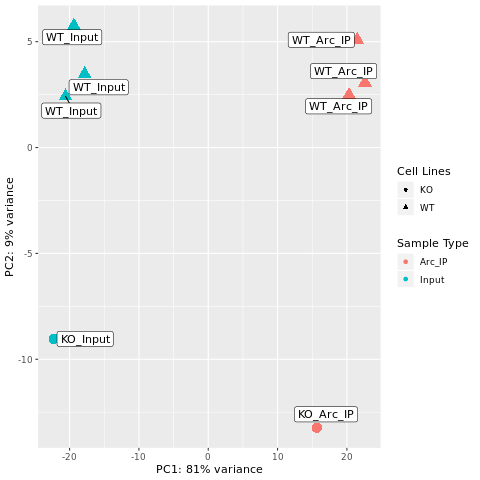

In [6]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)
## PCA Plot 
z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
percentVar <- round(100 * attr(z, "percentVar"))
p <- ggplot(z, aes(PC1, PC2)) +
  geom_point(aes(size = 4, color = sample.type, shape = cell.line)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  geom_label_repel(label = cond, force = 10) +
  labs(shape="Cell Lines", colour="Sample Type") +
  guides(size = FALSE)
print (p)

### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

In [12]:
%%R
# normalized counts 
ncu <- counts(dds, normalized=TRUE)
# Raw tabels 
write.table(ncu, file="gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
write.table(m, file="gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=all_cond )
# model:
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                   c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA)
# Positive results 
res <- data.frame(res, row.names = rownames(res))
positive_res <- res %>% 
                rownames_to_column('gene') %>%
                filter(log2FoldChange > 0 & pvalue < 1e-3)
positive_ncu <- ncu[positive_res$gene,]

write.table(positive_res, file="positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
write.table(positive_ncu, file="positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
# Print model results:
resultsNames(dds)

[1] "Intercept"                  "cond_KO_Arc_IP_vs_WT_Input"
[3] "cond_KO_Input_vs_WT_Input"  "cond_WT_Arc_IP_vs_WT_Input"


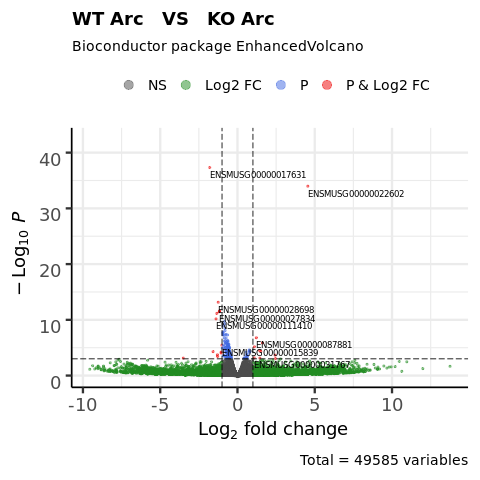

In [13]:
%%R
# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = 'WT Arc   VS   KO Arc',
    pCutoff = 1e-3,
    FCcutoff = 1)
print (vol)

In [15]:
%%R
# check top genes 
top_genes <- rownames (positive_ncu)
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}

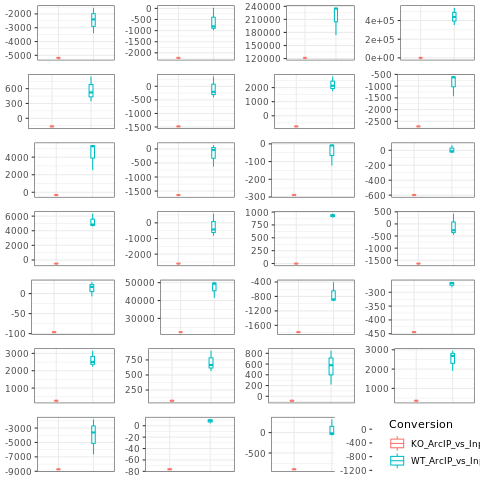

In [87]:
%%R 
# draw plots 
plist <- list()
pcntr <- 1
for (g in unique(check$Gene)){
    p <- ggplot(data = check %>% filter ( Gene == g ), 
                mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1) +
    scale_fill_grey() 
    if (pcntr < length (unique(check$Gene))){
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position="none")
    } else {
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position = "right")
    }
    plist[[pcntr]] <- p
    pcntr <- pcntr + 1
}
do.call(grid.arrange, c(plist, ncol = 4))

# Loci Viewer

### Normalize genomecov
> $scale = 1/ Size Factor$

In [100]:
%%R
dds <- estimateSizeFactors(dds)
data.frame('scale' = 1/sizeFactors(dds))

            scale
16207X1 1.0016876
16207X2 0.9676735
16207X3 0.9926122
16207X4 0.9151962
16207X5 1.0445346
16207X6 1.0194176
16207X7 0.9523425
16207X8 1.0873694


In [ ]:
%%bash
bedtools genomecov -bga -ibam 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam -scale 1.0016876 > 16207X1.cov.bg
bedtools genomecov -bga -ibam 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam -scale 0.9676735 > 16207X2.cov.bg
bedtools genomecov -bga -ibam 16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam -scale 0.9926122 > 16207X3.cov.bg
bedtools genomecov -bga -ibam 16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam -scale 0.9151962 > 16207X4.cov.bg
bedtools genomecov -bga -ibam 16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam -scale 1.0445346 > 16207X5.cov.bg
bedtools genomecov -bga -ibam 16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam -scale 1.0194176 > 16207X6.cov.bg
bedtools genomecov -bga -ibam 16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam -scale 0.9523425 > 16207X7.cov.bg
bedtools genomecov -bga -ibam 16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam -scale 1.0873694 > 16207X8.cov.bg

In [194]:
ls *.bg

16207X1.cov.bg  16207X3.cov.bg  16207X5.cov.bg  16207X7.cov.bg
16207X2.cov.bg  16207X4.cov.bg  16207X6.cov.bg  16207X8.cov.bg


### index bam files | _.bai_ files

In [33]:
%%bash
# needed for IGV
for f in *out.bam; do
    out=${f/.bam/.bam.bai}
    echo samtools index -@9 $f $out
done

samtools index -@9 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam 16207X1_AHCHHWDRXX_S8_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam 16207X2_AHCHHWDRXX_S7_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam 16207X3_AHCHHWDRXX_S6_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam 16207X4_AHCHHWDRXX_S5_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam 16207X5_AHCHHWDRXX_S4_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam 16207X6_AHCHHWDRXX_S3_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam 16207X7_AHCHHWDRXX_S2_Aligned.sortedByCoord.out.bam.bai
samtools index -@9 16207X8_AHCHHWDRXX_S1_Aligned.sortedByCoord.out.bam 16207X8_AHCHHWDRXX_S1_Aligned.sortedByCo

### Load R

In [6]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R
library(dplyr, quietly = TRUE)
library(scales, quietly = TRUE)
library(Gviz, quietly = TRUE)
library(GenomicRanges, quietly = TRUE)
library(TxDb.Mmusculus.UCSC.mm10.knownGene, quietly = TRUE)
library(rtracklayer, quietly = TRUE)
library(GenomicFeatures, quietly = TRUE)
library(data.table, quietly = TRUE)

In [25]:
%%R
### condition labels 
cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
all_cond <- paste(cell.line, replicate, sample.type, sep="_")
### cleaner function 
fc_cleaner <- function (fc){
    # chromosomes 
    tmp <- list()
    for (i in fc$Chr){tmp <- c(tmp,strsplit(i,';')[[1]][1])}
    fc$Chr <- unlist (tmp)
    # starts 
    tmp <- list()
    for (i in fc$Start){ tmp <- c(tmp,min(as.numeric(strsplit(i,';')[[1]])))}
    fc$Start <- as.numeric(unlist (tmp))
    # ends 
    tmp <- list()
    for (i in fc$End){ tmp <- c(tmp,max(as.numeric(strsplit(i,';')[[1]])))}
    fc$End <- as.numeric(unlist (tmp))
    # strands
    tmp <- list()
    for (i in fc$Strand){tmp <- c(tmp,strsplit(i,';')[[1]][1])}
    fc$Strand <- unlist (tmp)
    return (fc)
}
### load genomes
# mm10 ref genome
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene

# read all bedgraph files in R
bg_files <- list.files(pattern="cov.bg$")
for (i in 1:length(bg_files)){
    assign(paste0("bedgraph_X", i), fread(bg_files[i], col.names = c('chromosome', 'start', 'end', 'value'))
)}
### top genes 
files <- list.files(pattern="gene.fc$")
positive <- rownames(read.table(file="positive_gene_count_table_DE2norm.txt", sep="\t"))
top_genes <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, NA, NA, NA, NA, NA,'NULL'),check.names=F, stringsAsFactors = F)})[[1]]
top_genes <- fc_cleaner(top_genes %>% filter ( Geneid %in% positive) )
### make top gene and gene stats dataframe:
tmp <- read.table(file="positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t") [,-1]
colnames(tmp) <- droplevels(unlist (tmp[1,], use.names = FALSE))
tmp <- tmp[-1,]
rownames (tmp) <- tmp$gene
tmp <- tmp[top_genes$Geneid,] %>% dplyr::select (pvalue, log2FoldChange)
gene_stats <- data.frame (
    "Chr" = top_genes$Chr,
    "Strand" = top_genes$Strand,
    "Width" = top_genes$Length,
    "Start" = top_genes$Start,
    "End" = top_genes$End,                          
    "log2FoldChange" = round(as.numeric(as.character(tmp$log2FoldChange)), digits = 6), 
    "P-value" = scientific(as.numeric(as.character(tmp$pvalue)), digits = 3)
)
row.names(gene_stats) <- top_genes$Geneid
### plot generator function 
loci_plots <- function (cc, l_scale = 0, r_scale = 0, Z_out = 0, y_lim = NULL){
    ####
    print ("The top gene:")
    print (gene_stats[cc,] %>% dplyr::select(-Start, -End) )
    ####
    grtrack <- GeneRegionTrack(
        txdb, genome = 'mm10', 
        chromosome = as.character(gene_stats$Chr[cc]), name = "Gene Model",
        transcriptAnnotation = "symbol", showId=TRUE, geneSymbol=TRUE,
        background.panel = "#FFFEDB", background.title = "darkblue"
    )
    ####
    goverlap <- subsetByOverlaps(grtrack@range, GRanges(seqnames=gene_stats$Chr[cc], 
                                 ranges=IRanges(start = gene_stats$Start[cc], end = gene_stats$End[cc])))
    Transcript <- unique(subsetByOverlaps(grtrack@range, goverlap)$transcript)
    print ("mm10 overlap transcript:")
    print (Transcript)
    ####
    # final plot calling
    ots <- list()
    for (d in seq(1, by = 2, len = length(all_cond)/2)){
        #create data
        dtrack <- DataTrack(range = get(paste('bedgraph_X', d,sep='')), genome = "mm10",
                            from = gene_stats$Start[cc] - Z_out, to = gene_stats$End[cc] + Z_out,
                            chromosome = as.character(gene_stats$Chr[cc]))
        dtrack2<- DataTrack(range = get(paste('bedgraph_X', d + 1,sep='')), genome = "mm10",
                            from = gene_stats$Start[cc] - Z_out, to = gene_stats$End[cc] + Z_out,
                            chromosome = as.character(gene_stats$Chr[cc]),
                            groups = factor(all_cond[d+1],levels = c(all_cond[d],all_cond[d+1])))
        # Overlay IP and Input
        displayPars(dtrack) <- list(groups = factor(all_cond[d],levels = c(all_cond[d],all_cond[d+1]) ),
                                                    legend = TRUE)
        ots <- append (ots, OverlayTrack(trackList=list(dtrack2, dtrack)))
    }
    itrack <- IdeogramTrack(genome = 'mm10', chromosome = as.character(gene_stats$Chr[cc]))
    gtrack <- GenomeAxisTrack()
    plotTracks(append (list (itrack, gtrack), ots),
               from = gene_stats$Start[cc] - Z_out, to = gene_stats$End[cc] + Z_out,
               ylim = y_lim, type = "smooth")
    plotTracks(list (itrack, grtrack, gtrack),
               from = gene_stats$Start[cc], to = gene_stats$End[cc], main = "Transcripts",
               extend.left=l_scale, extend.right=r_scale)
}
# Genes for loci plot:
print (gene_stats %>% dplyr::select(-Start, -End) )

                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000073702  chr1      +  1662       0.629542 3.42e-04
ENSMUSG00000026098  chr1      -  7542       0.658668 9.72e-04
ENSMUSG00000103186  chr1      -   406       2.453144 9.12e-04
ENSMUSG00000041245  chrX      + 10589       0.556025 6.41e-05
ENSMUSG00000089417  chr3      -   343       1.096968 6.86e-06
ENSMUSG00000028218  chr4      -  4683       0.546868 9.60e-04
ENSMUSG00000076498  chr6      +   692       1.432644 3.35e-05
ENSMUSG00000088835  chr6      +   271       1.510002 4.66e-05
ENSMUSG00000110279  chr7      +   778       0.645591 3.26e-04
ENSMUSG00000003429  chr7      -   865       0.511992 8.54e-04
ENSMUSG00000030753  chr7      +  4125       0.433270 8.59e-04
ENSMUSG00000030876  chr7      +  4357       0.494506 8.22e-04
ENSMUSG00000035365 chr10      -  3594       1.446002 7.39e-04
ENSMUSG00000093674 chr10      -  1168       0.807692 5.43e-05
ENSMUSG00000031617  chr8      -  2723       0.746457 6.98e-05
ENSMUSG0

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000073702 chr1      +  1662       0.629542 3.42e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000086535.11" "ENSMUST00000194746.5"  "ENSMUST00000178079.7" 
[4] "ENSMUST00000179954.7"  "ENSMUST00000195123.5"  "ENSMUST00000191855.1" 
[7] "ENSMUST00000054462.10" "ENSMUST00000192099.1"  "ENSMUST00000192531.5" 


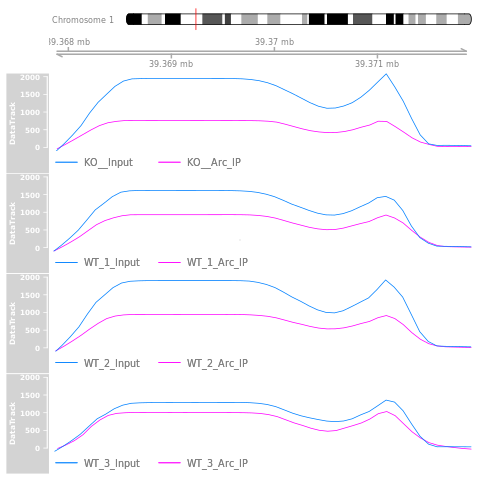

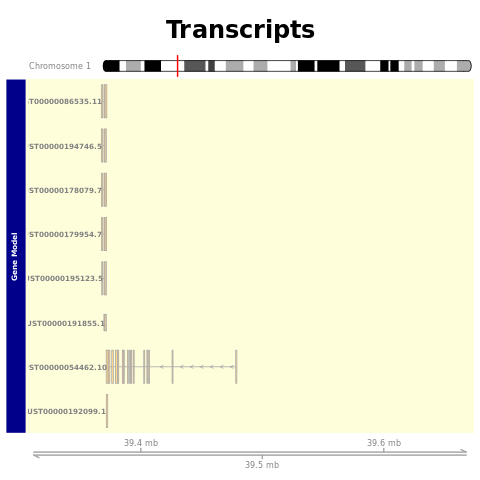

In [92]:
%%R
loci_plots (1, 6e4, 3e5, # Z_out = 100,
            y_lim = c(0,2e3)) 

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000026098 chr1      -  7542       0.658668 9.72e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000191402.1"  "ENSMUST00000027267.13" "ENSMUST00000135246.7" 
[4] "ENSMUST00000142922.1"  "ENSMUST00000128337.7"  "ENSMUST00000133358.1" 
[7] "ENSMUST00000126590.1"  "ENSMUST00000126412.1"  "ENSMUST00000188890.1" 


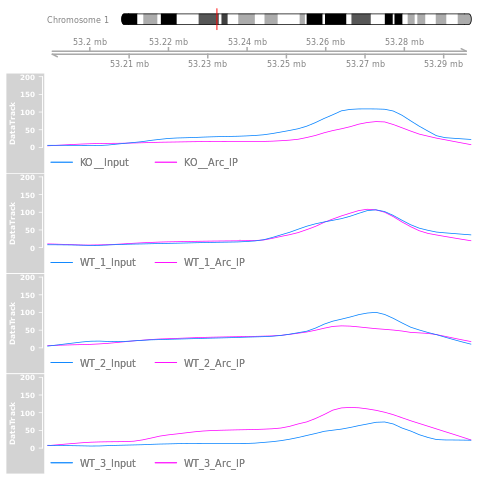

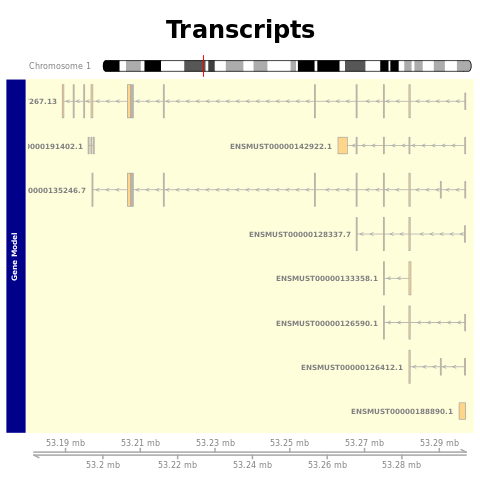

In [101]:
%%R
loci_plots (2, 9e3, 1.5e3, # Z_out = 100, 
            y_lim = c(0,200))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000103186 chr1      -   406       2.453144 9.12e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000193887.1"


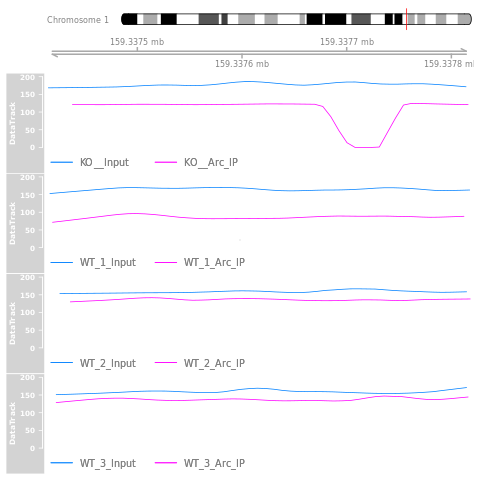

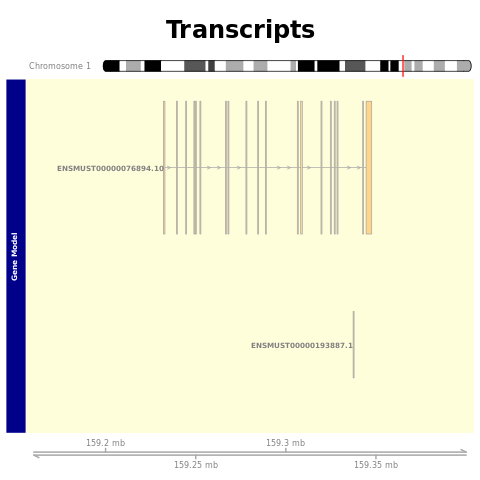

In [54]:
%%R
loci_plots (3, 1.8e5, 6.5e4, # Z_out = 100, 
            y_lim = c(0,200))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000041245 chrX      + 10589       0.556025 6.41e-05
[1] "mm10 overlap transcript:"
 [1] "ENSMUST00000184392.7" "ENSMUST00000184730.7" "ENSMUST00000149140.7"
 [4] "ENSMUST00000096285.4" "ENSMUST00000131844.1" "ENSMUST00000133852.1"
 [7] "ENSMUST00000121545.1" "ENSMUST00000082590.1" "ENSMUST00000175942.7"
[10] "ENSMUST00000146161.7" "ENSMUST00000176662.1" "ENSMUST00000175825.1"


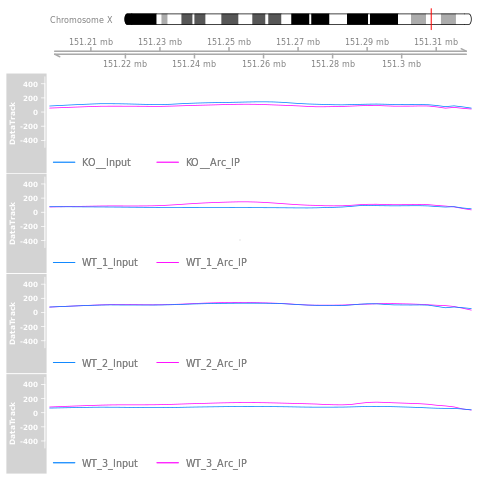

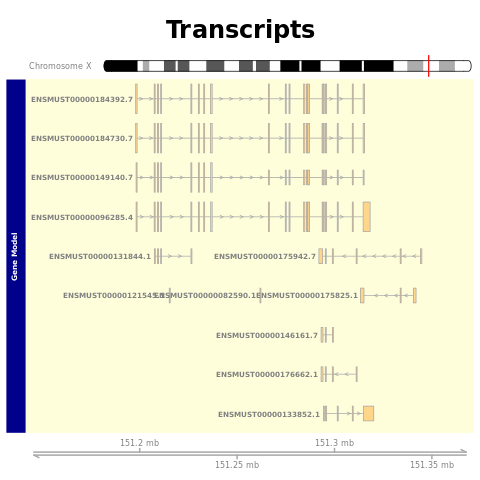

In [80]:
%%R
loci_plots (4, 5.5e4, 5e4, # Z_out = 100, 
            y_lim = c(-500,500))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000089417 chr3      -   343       1.096968 6.86e-06
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000158792.1"


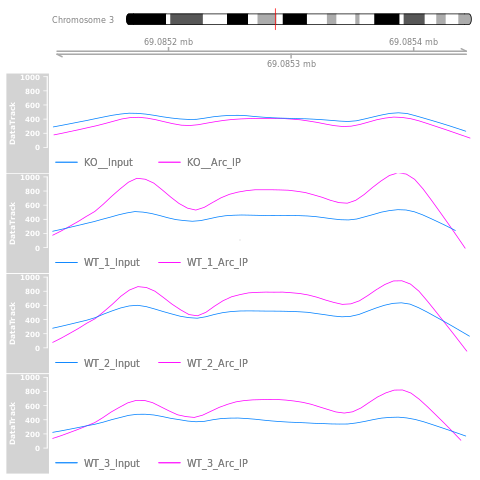

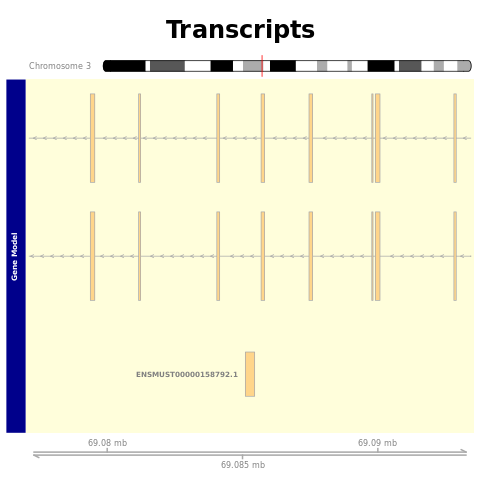

In [102]:
%%R
loci_plots (5, 8e3, 8e3, # Z_out = 100, 
            y_lim = c(0,1000))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000028218 chr4      -  4683       0.546868 9.60e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000108285.8"  "ENSMUST00000177837.7"  "ENSMUST00000087052.10"
[4] "ENSMUST00000172728.1"  "ENSMUST00000154416.2"  "ENSMUST00000126012.2" 
[7] "ENSMUST00000126808.7"  "ENSMUST00000152219.1" 


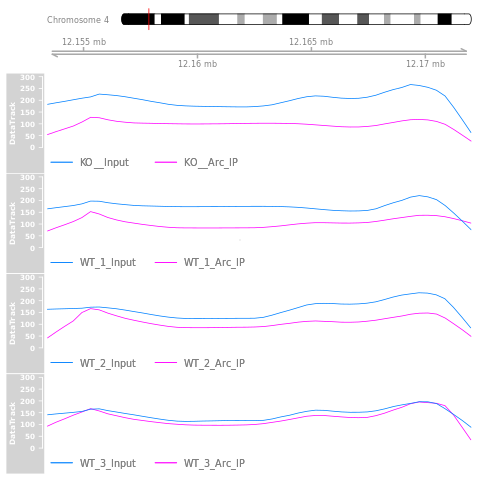

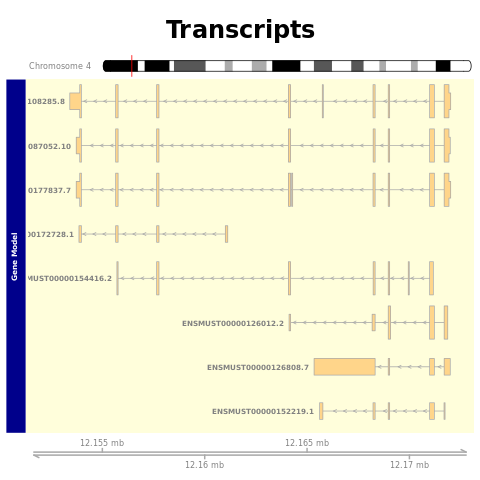

In [82]:
%%R
loci_plots (6, 2e3, 1e3, # Z_out = 100, 
            y_lim = c(0,300))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000076498 chr6      +   692       1.432644 3.35e-05
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000103299.2"


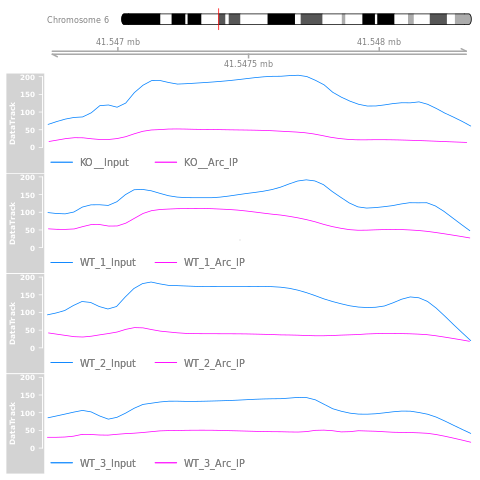

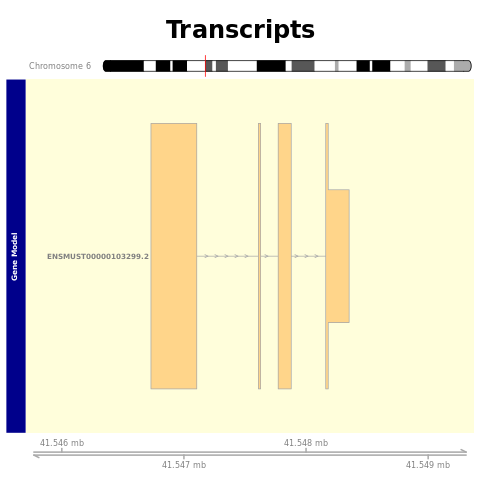

In [57]:
%%R
loci_plots (7, 1e3, 1e3, # Z_out = 100, 
            y_lim = c(0,200))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000088835 chr6      +   271       1.510002 4.66e-05
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000158210.1"  "ENSMUST00000143000.7"  "ENSMUST00000129422.1" 
[4] "ENSMUST00000004375.15" "ENSMUST00000130279.1"  "ENSMUST00000145447.7" 


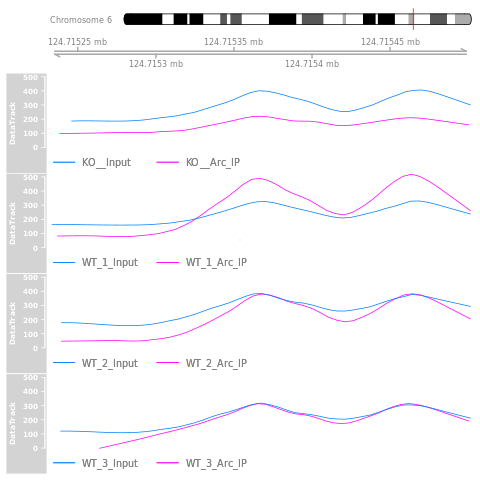

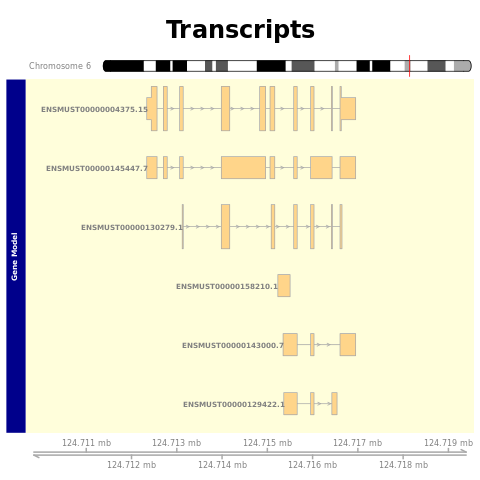

In [58]:
%%R
loci_plots (8, 5.5e3, 4e3, # Z_out = 100, 
            y_lim = c(0,500))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000110279 chr7      +   778       0.645591 3.26e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000209340.1" "ENSMUST00000003521.9" "ENSMUST00000209838.1"
[4] "ENSMUST00000211725.1" "ENSMUST00000211583.1" "ENSMUST00000082833.1"


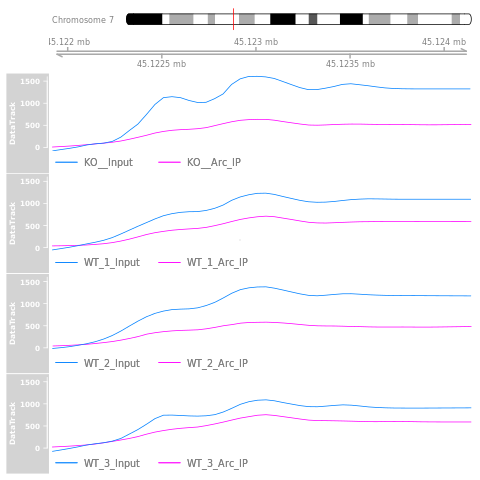

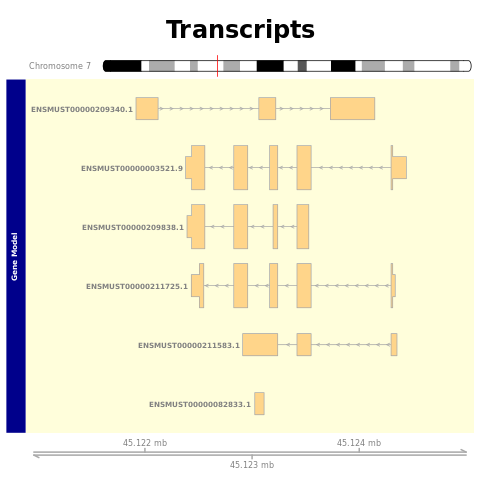

In [59]:
%%R
loci_plots (9, 1e3, 900, # Z_out = 100, 
            y_lim = c(0,1600))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000003429 chr7      -   865       0.511992 8.54e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000209340.1" "ENSMUST00000003521.9" "ENSMUST00000209838.1"
[4] "ENSMUST00000211725.1" "ENSMUST00000211583.1" "ENSMUST00000082833.1"


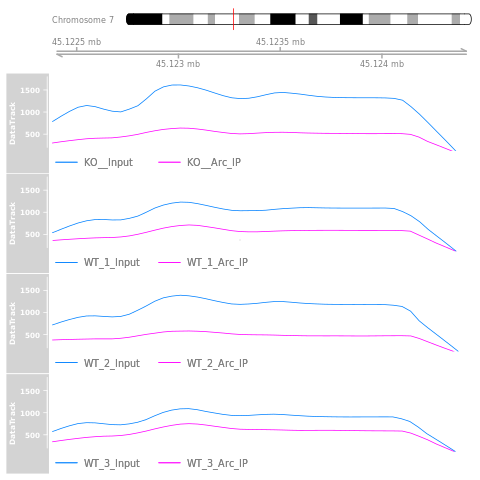

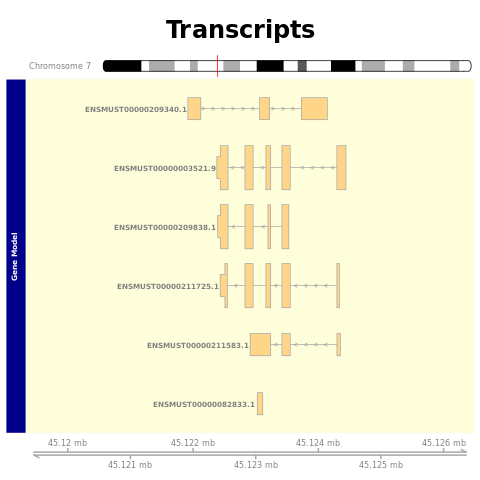

In [103]:
%%R
loci_plots (10 ,3e3, 2e3, # Z_out = 100, 
            y_lim = c(200,1800))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000030753 chr7      +  4125        0.43327 8.59e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000126356.7"  "ENSMUST00000033009.15" "ENSMUST00000153566.1" 
[4] "ENSMUST00000146473.1" 


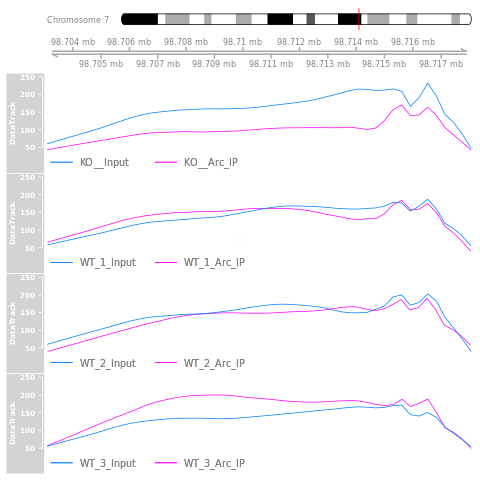

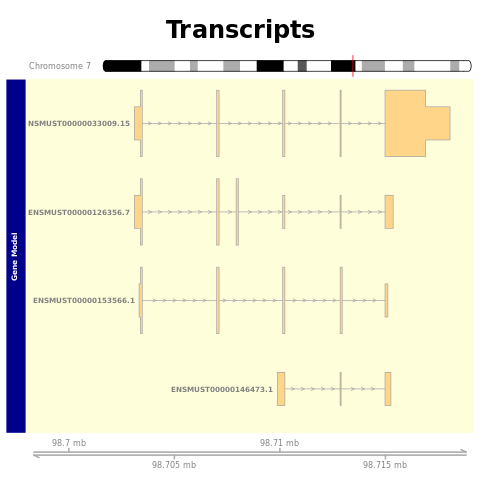

In [84]:
%%R
loci_plots (11, 5e3, 1e3, # Z_out = 100, 
            y_lim = c(50,250))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000030876 chr7      +  4357       0.494506 8.22e-04
[1] "mm10 overlap transcript:"
 [1] "ENSMUST00000033163.7" "ENSMUST00000207332.1" "ENSMUST00000207351.1"
 [4] "ENSMUST00000208652.1" "ENSMUST00000208157.1" "ENSMUST00000207835.1"
 [7] "ENSMUST00000065740.2" "ENSMUST00000184804.1" "ENSMUST00000207806.1"
[10] "ENSMUST00000047194.3"


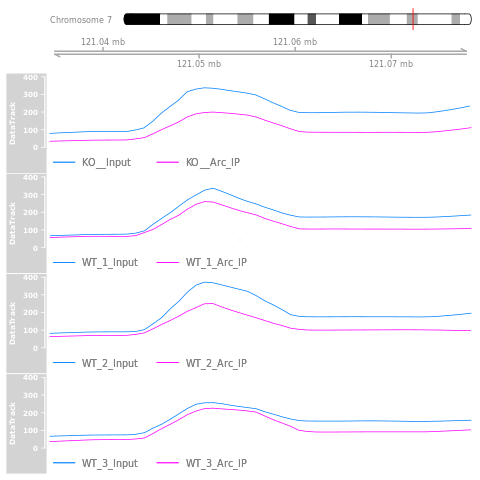

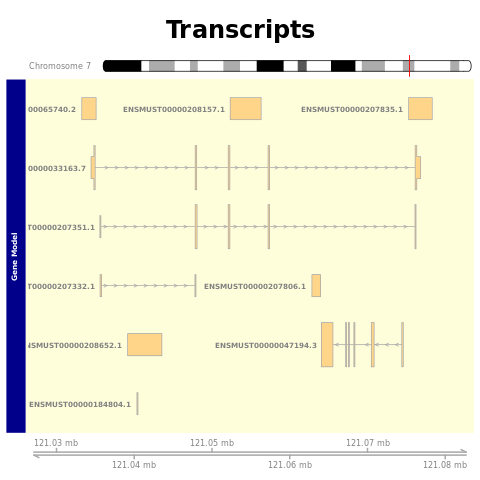

In [85]:
%%R
loci_plots (12, 8e3, 5e3, # Z_out = 100, 
            y_lim = c(0,400))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000035365 chr10      -  3594       1.446002 7.39e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000048621.7"  "ENSMUST00000218993.1"  "ENSMUST00000048518.15"
[4] "ENSMUST00000164121.7"  "ENSMUST00000168163.7"  "ENSMUST00000164803.1" 
[7] "ENSMUST00000218063.1" 


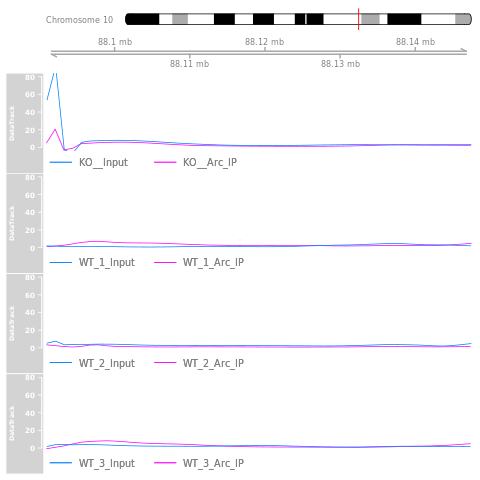

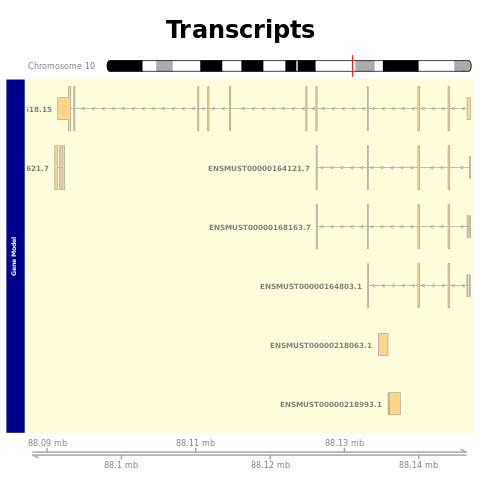

In [93]:
%%R
loci_plots (13, 4e3, 1e2, Z_out = 500, 
            y_lim = c(0,80))

In [104]:
%%R
loci_plots (14, 1e3, 800, # Z_out = 100, 
            y_lim = c(0,3.2.8e3))

RParsingError: R parsing

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000031617 chr8      -  2723       0.746457 6.98e-05
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000034030.14" "ENSMUST00000152168.7"  "ENSMUST00000141202.1" 


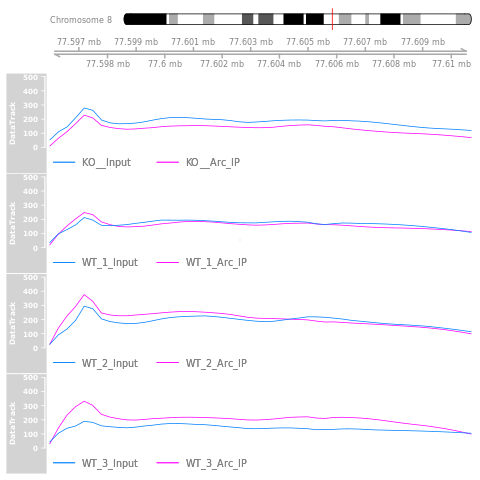

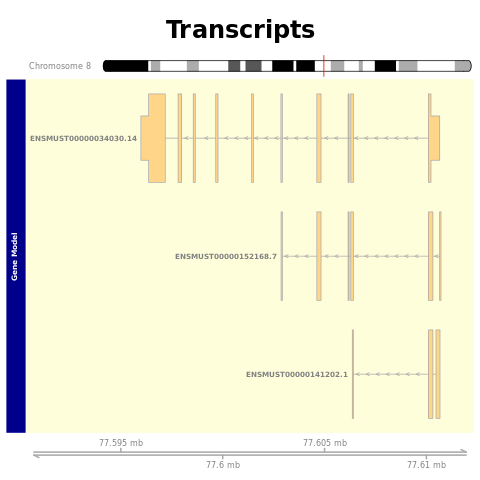

In [87]:
%%R
loci_plots (15, 5.5e3, 1.5e3, # Z_out = 100, 
            y_lim = c(0,500))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000110588 chr8      -  2665       0.633221 1.59e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000034214.7" "ENSMUST00000212806.1" "ENSMUST00000211992.1"


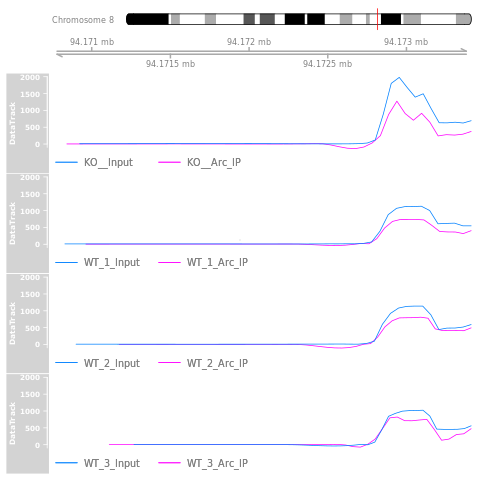

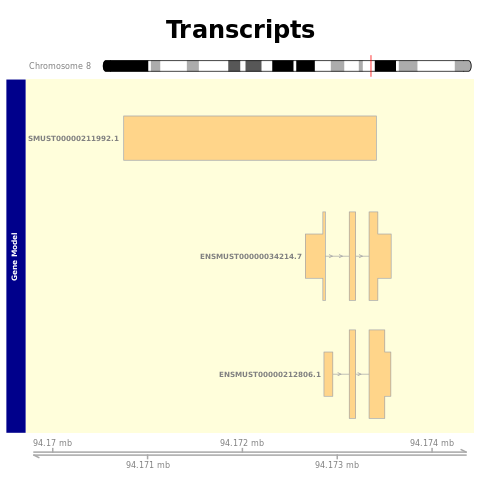

In [88]:
%%R
loci_plots (16, 1e3, 1e3, # Z_out = 100, 
            y_lim = c(-100,2e3))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000031762 chr8      +   588       0.608437 2.02e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000034214.7" "ENSMUST00000212806.1" "ENSMUST00000211992.1"


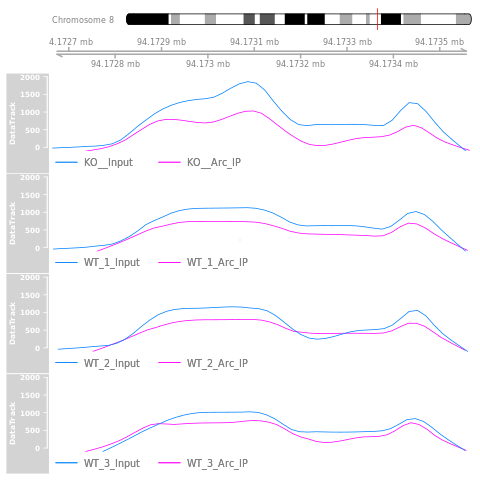

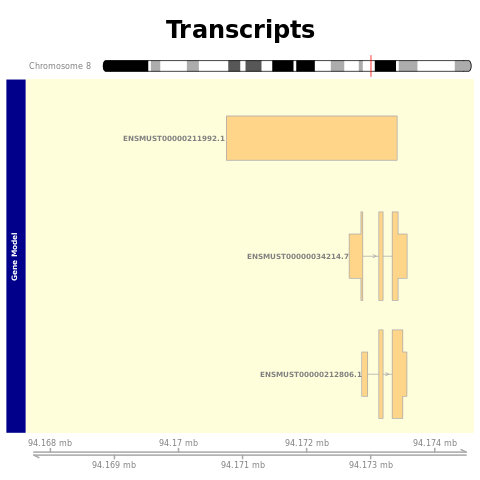

In [89]:
%%R
loci_plots (17, 5e3, 1e3, # Z_out = 100, 
            y_lim = c(0,2e3))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000031767 chr8      +  5618       1.090505 6.66e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000073521.11" "ENSMUST00000066514.12" "ENSMUST00000109109.7" 
[4] "ENSMUST00000147605.7"  "ENSMUST00000134593.1" 


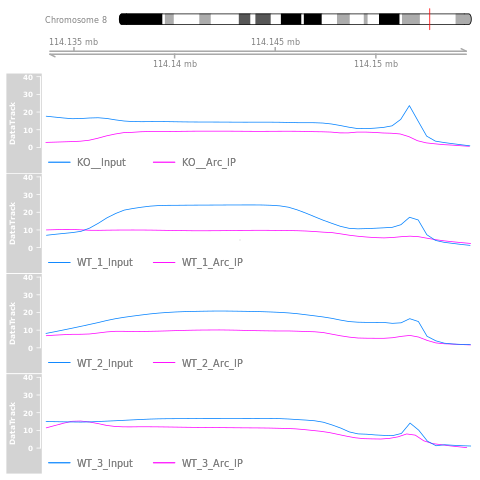

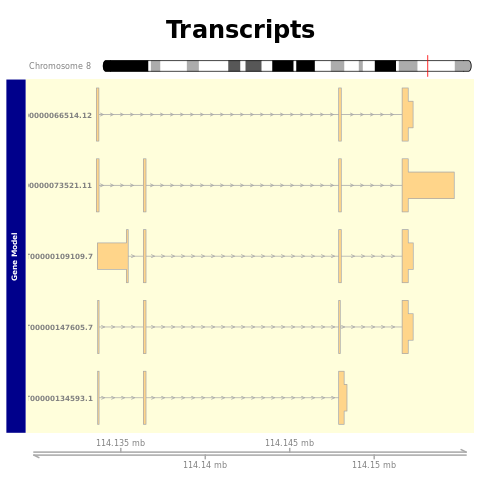

In [90]:
%%R
loci_plots (18, 4e3, 1e3, # Z_out = 100, 
            y_lim = c(0,40))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000060143 chr14      +   384       2.431489 2.21e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000073238.6" "ENSMUST00000227553.1"


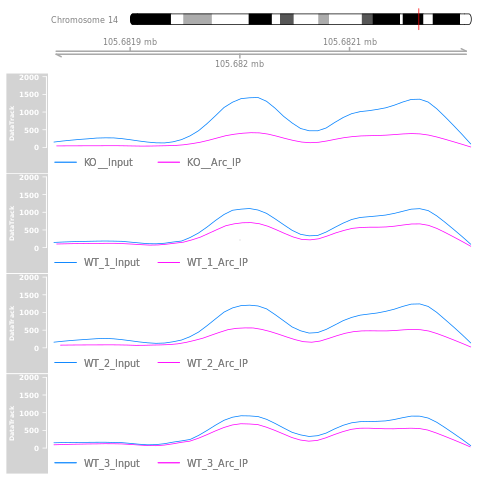

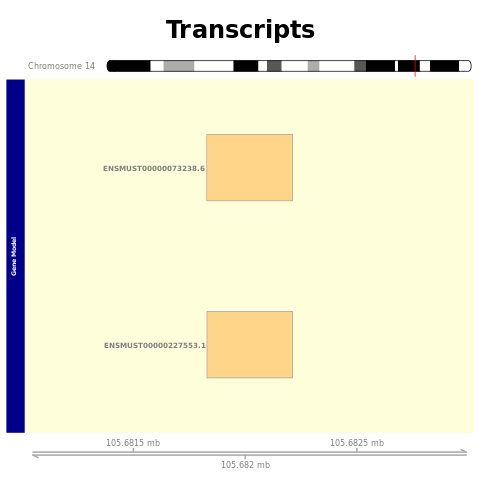

In [91]:
%%R
loci_plots (19, 800, 800, # Z_out = 100, 
            y_lim = c(0,2e3))

[1] "The top gene:"
                    Chr Strand Width log2FoldChange  P.value
ENSMUSG00000044229 chr9      +  5911       0.563815 6.56e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000216998.1"  "ENSMUST00000215780.1"  "ENSMUST00000093853.4" 
[4] "ENSMUST00000217002.1"  "ENSMUST00000034527.13" "ENSMUST00000135457.7" 
[7] "ENSMUST00000137976.1"  "ENSMUST00000149185.7"  "ENSMUST00000142667.1" 


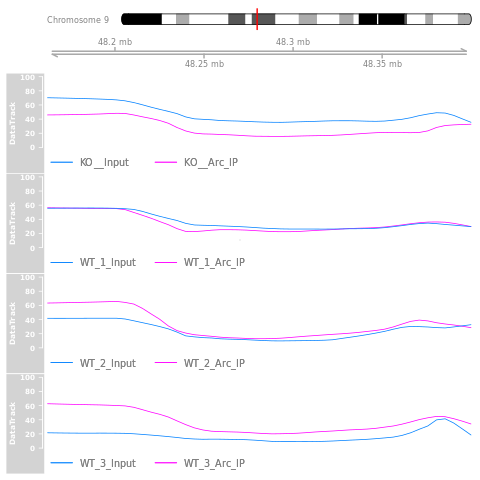

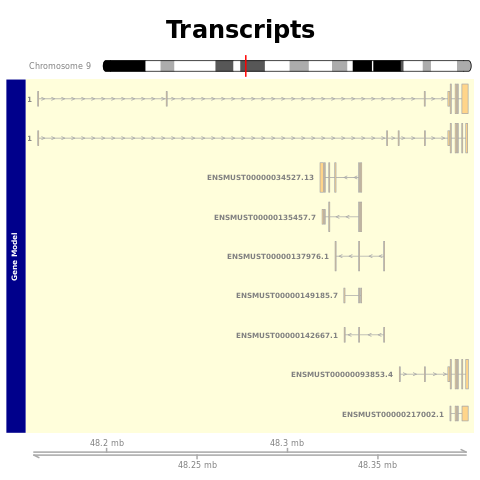

In [94]:
%%R
loci_plots (20, 5e3, 1.5e3, # Z_out = 100, 
            y_lim = c(0,100))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000087881 chr11      -   144       1.221429 1.62e-07
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000157256.1"


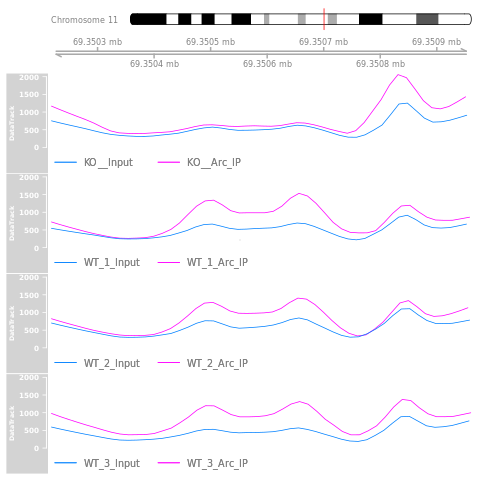

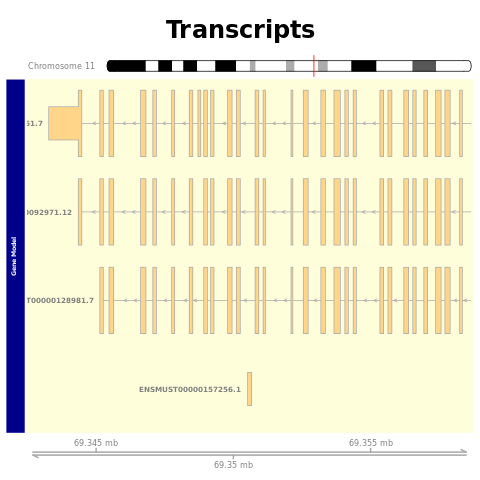

In [95]:
%%R
loci_plots (21, 8e3, 8e3, Z_out = 300, 
            y_lim = c(0,2e3))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000019437 chr11      +  5009       0.601936 7.30e-04
[1] "mm10 overlap transcript:"
 [1] "ENSMUST00000098545.11" "ENSMUST00000147819.7"  "ENSMUST00000145507.7" 
 [4] "ENSMUST00000092880.13" "ENSMUST00000127587.7"  "ENSMUST00000141578.1" 
 [7] "ENSMUST00000108338.1"  "ENSMUST00000184358.1"  "ENSMUST00000140379.1" 
[10] "ENSMUST00000127270.1"  "ENSMUST00000102483.4"  "ENSMUST00000144561.1" 
[13] "ENSMUST00000082606.1"  "ENSMUST00000104437.1" 


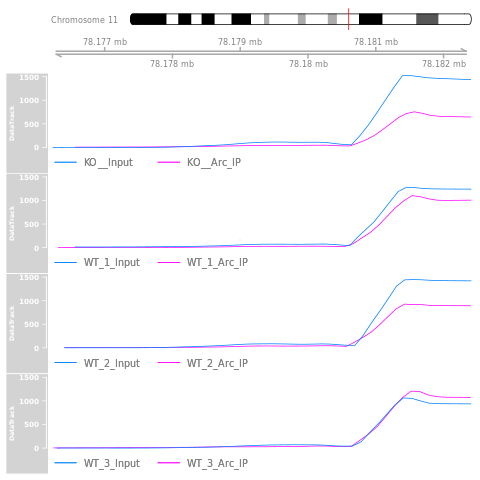

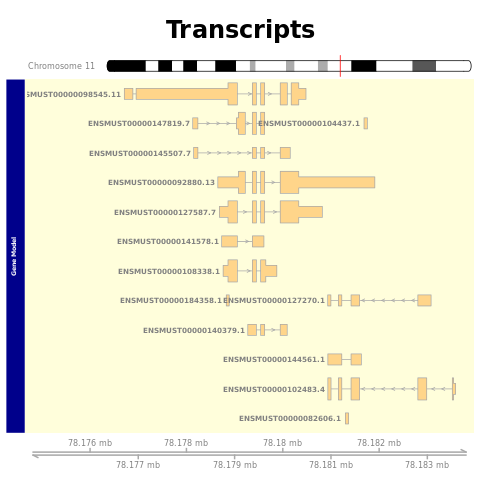

In [96]:
%%R
loci_plots (22, 2e3, 2e3, Z_out = 500, y_lim = c(0,1.5e3))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000058546 chr11      -   847       0.768157 2.45e-05
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000098545.11" "ENSMUST00000127587.7"  "ENSMUST00000092880.13"
[4] "ENSMUST00000127270.1"  "ENSMUST00000102483.4"  "ENSMUST00000144561.1" 
[7] "ENSMUST00000082606.1"  "ENSMUST00000104437.1"  "ENSMUST00000083742.1" 


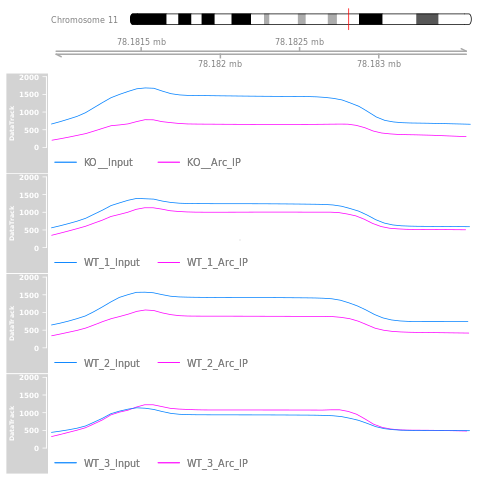

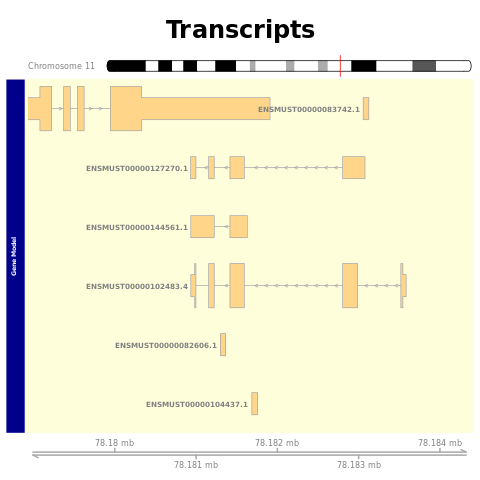

In [97]:
%%R
loci_plots (23, 2e3, 800, # Z_out = 100, 
            y_lim = c(0,2e3))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000044067 chr12      -  4608       0.530074 2.94e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000057783.4" "ENSMUST00000176710.1" "ENSMUST00000174480.2"


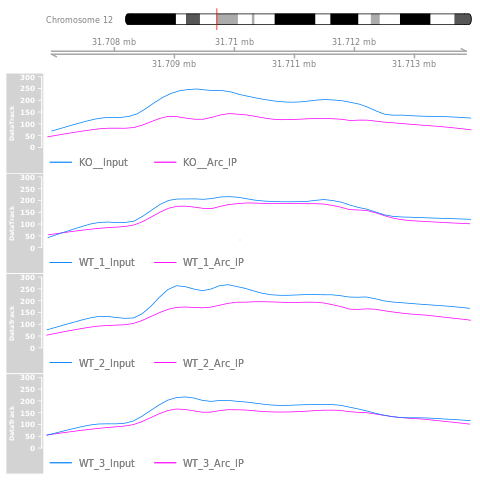

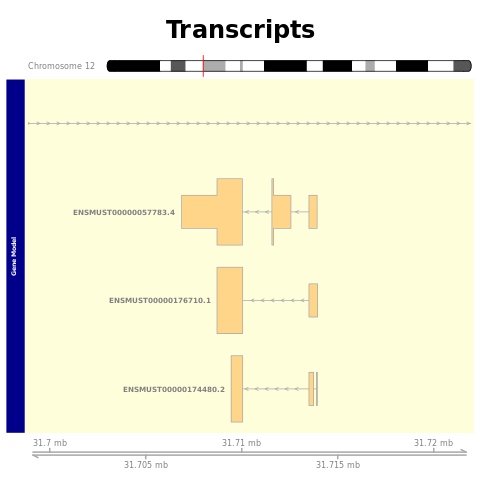

In [98]:
%%R
loci_plots (24, 8e3, 8e3, # Z_out = 100, 
            y_lim = c(0,300))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000021140 chr12      + 12139         0.7437 3.69e-05
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000221721.1" "ENSMUST00000021567.5" "ENSMUST00000222005.1"
[4] "ENSMUST00000221675.1" "ENSMUST00000222828.1" "ENSMUST00000222908.1"
[7] "ENSMUST00000221472.1" "ENSMUST00000222468.1" "ENSMUST00000223212.1"


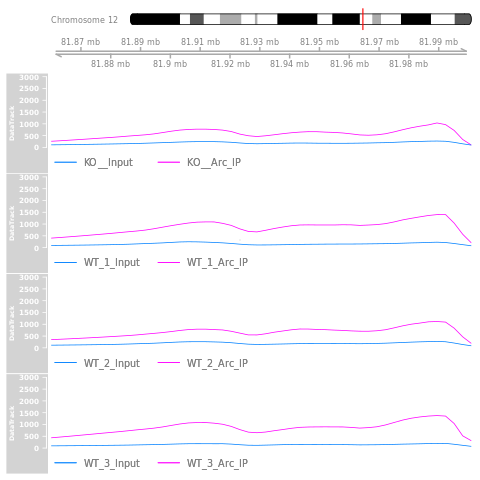

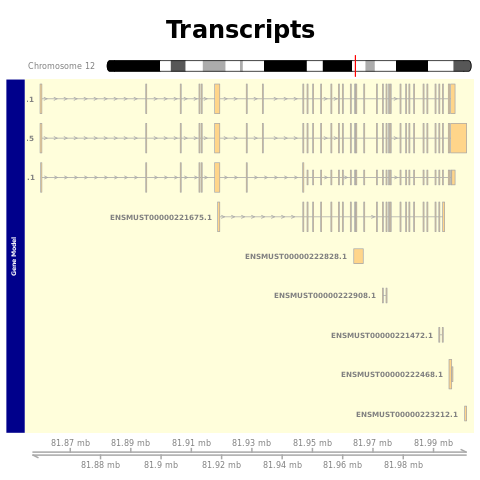

In [99]:
%%R
loci_plots (25, 4e3, 1.5e3, # Z_out = 100, 
            y_lim = c(0,3e3))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000088789 chr12      -   275       1.618207 1.36e-06
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000158164.1" "ENSMUST00000198802.1"


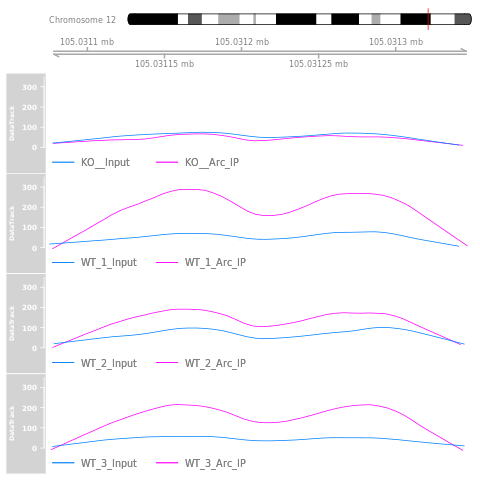

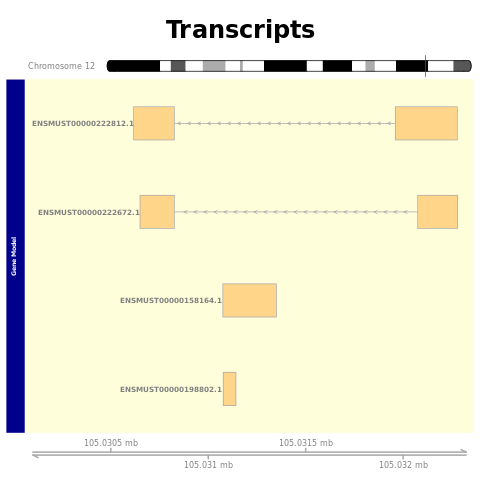

In [76]:
%%R
loci_plots (26, 1e3, 1e3, # Z_out = 100, 
            y_lim = c(0,350))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000022602 chr15      -  3057       4.549533 1.05e-34
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000023268.13" "ENSMUST00000110009.3" 


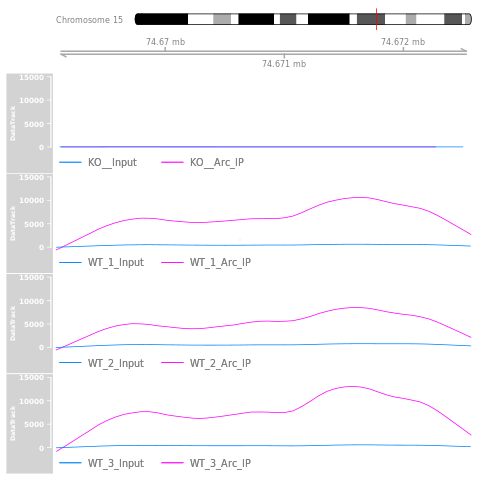

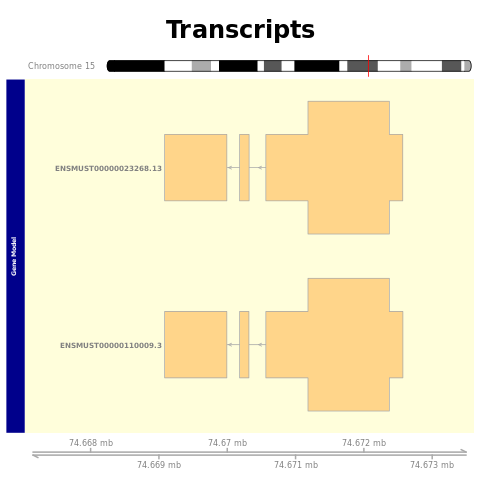

In [77]:
%%R
loci_plots (27, 2e3, 1e3, # Z_out = 100, 
            y_lim = c(-100,15e3))

[1] "The top gene:"
                     Chr Strand Width log2FoldChange  P.value
ENSMUSG00000060657 chr16      -  7765       0.434282 6.58e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000090300.5" "ENSMUST00000183739.1" "ENSMUST00000231032.1"
[4] "ENSMUST00000229614.1"


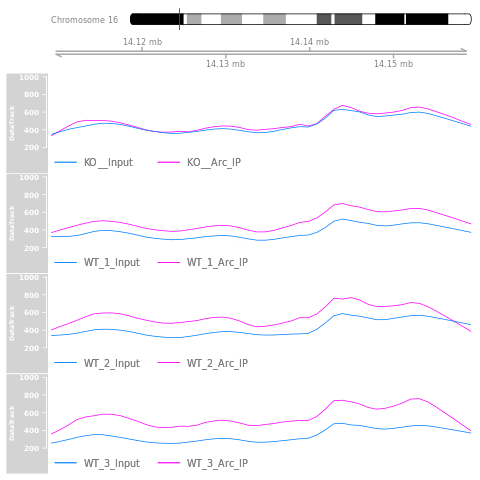

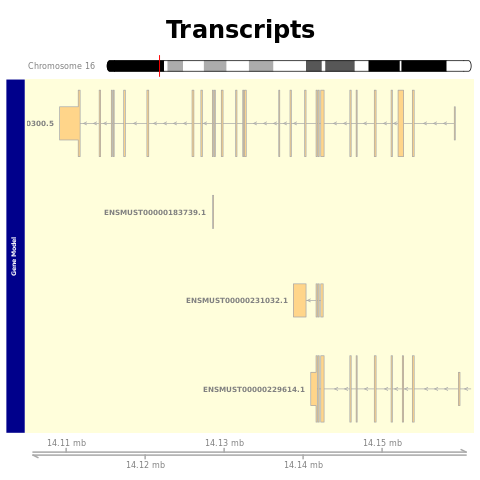

In [100]:
%%R
loci_plots (28, 4e3, 2e3, # Z_out = 100, 
            y_lim = c(200,1e3))

# _de-novo_ transcript annotation

In [ ]:
%%bash 
# merge all .bam files 
samtools merge -@ 12 all.merged.bam *.bam
# sort the merged file 
samtools sort -@12 all.merged.bam > all.merged.sort.bam
# using scallop to make de-novo transcipt annotation (.gtf file)
scallop --library_type first -i all.merged.sort.bam -o all.merged.scallop.gtf

In [186]:
%%bash 
ls *.gtf

all.merged.scallop.gtf


### Measure counts

In [ ]:
%%bash
for f in *out.bam; do
    out=${f/_AHCHHWDRXX_S[1-8]_Aligned.sortedByCoord.out.bam/.denovo.fc}
    featureCounts -T 12 -P -B -C -O -t exon -g gene_id -a /rumi/shams/abe/People/Jason/all.merged.scallop.gtf -o $out $f;
done

In [188]:
%%bash
ls *.denovo.fc

16207X1.denovo.fc
16207X2.denovo.fc
16207X3.denovo.fc
16207X4.denovo.fc
16207X5.denovo.fc
16207X6.denovo.fc
16207X7.denovo.fc
16207X8.denovo.fc


### Load R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [88]:
%%R
library(DESeq2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(ggrepel, quietly = TRUE)
library(EnhancedVolcano, quietly = TRUE)
library(ggpubr, quietly = TRUE)

## Read data 

In [93]:
%%R
files <- list.files(pattern="denovo.fc$")

cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
cond <- paste(cell.line, sample.type, sep="_")
all_cond <- paste(cell.line, replicate, sample.type, sep="_")

datalist <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- m[,1]
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
f_name <- unlist(lapply(colnames(m), function(i) unlist(strsplit(i, "_"))[1]))
colnames(m) <- f_name
colData <- data.frame(cond, row.names=f_name)

# DE Analysis

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates



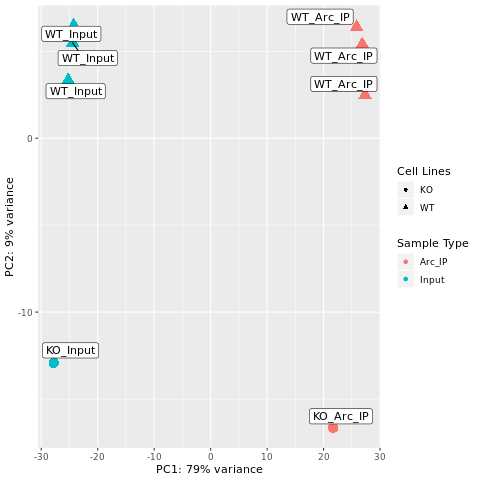

In [94]:
%%R
dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
dds$cond <- relevel(dds$cond, ref="WT_Input")
dds <- DESeq(dds)
cds <- estimateDispersions(dds)
vsd <- varianceStabilizingTransformation(cds)
## PCA Plot 
z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
percentVar <- round(100 * attr(z, "percentVar"))
p <- ggplot(z, aes(PC1, PC2)) +
  geom_point(aes(size = 4, color = sample.type, shape = cell.line)) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) +
  geom_label_repel(label = cond, force = 10) +
  labs(shape="Cell Lines", colour="Sample Type") +
  guides(size = FALSE)
print (p)

### Model $$(WT ArcIP - WT Input) - (KO ArcIP - KO Input)$$

In [96]:
%%R
# normalized counts 
ncu <- counts(dds, normalized=TRUE)
# Raw tabels 
write.table(ncu, file="denovo_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
write.table(m, file="denovo_gene_count_table_raw.txt", sep="\t", quote=FALSE, col.names=all_cond)
# model:
res <- results(dds, contrast=list(c('cond_WT_Arc_IP_vs_WT_Input', 'cond_KO_Input_vs_WT_Input'),
                                   c('cond_KO_Arc_IP_vs_WT_Input')), listValues=c(1,-1))
write.table(res, "denovo_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA )
# Positive results 
res <- data.frame(res, row.names = rownames(res))
positive_res <- res %>% 
                rownames_to_column('gene') %>%
                filter(log2FoldChange > 0 & pvalue < 1e-3)
positive_ncu <- ncu[positive_res$gene,]

write.table(positive_res, file="denovo_positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t", quote=FALSE, col.names=NA)
write.table(positive_ncu, file="denovo_positive_gene_count_table_DE2norm.txt", sep="\t", quote=FALSE, col.names=all_cond) 
# Print model results:
resultsNames(dds)

[1] "Intercept"                  "cond_KO_Arc_IP_vs_WT_Input"
[3] "cond_KO_Input_vs_WT_Input"  "cond_WT_Arc_IP_vs_WT_Input"


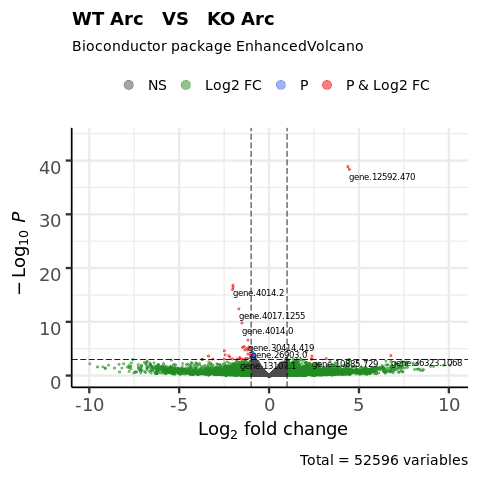

In [97]:
%%R
# Volcano plot 
vol <- EnhancedVolcano(res,
    lab = rownames(res),
    x = 'log2FoldChange',
    y = 'pvalue',
#     xlim = c(-6, 6),
    title = 'WT Arc   VS   KO Arc',
    pCutoff = 1e-3,
    FCcutoff = 1)
print (vol)

In [98]:
%%R
# check top genes 
top_genes <- rownames (positive_ncu)
myplots <- list() 
check <- data.frame()
for (g in 1:length(top_genes)){
    check <- rbind(check,data.frame(
                        'Differential_Expression' = c(
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'WT_Input'))],
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Arc_IP'))] -
                            ncu[top_genes[g],rownames(subset (colData,cond == 'KO_Input'))]),
                        'Conversion' = c(rep('WT_ArcIP_vs_Input',3),rep('KO_ArcIP_vs_Input',1)),
                        'Gene' = top_genes[g]))
    rownames(check) <- c()

}

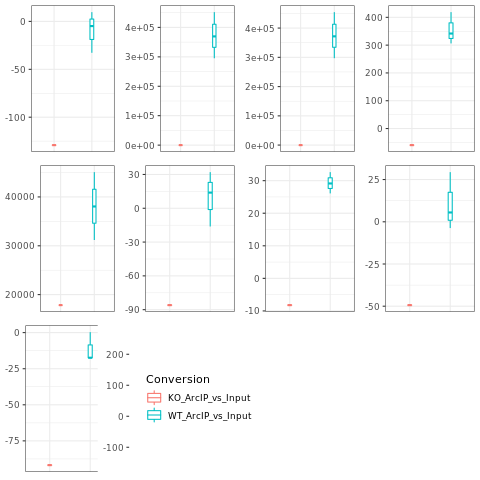

In [99]:
%%R 
# draw plots 
plist <- list()
pcntr <- 1
for (g in unique(check$Gene)){
    p <- ggplot(data = check %>% filter ( Gene == g ), 
                mapping = aes(x = Conversion, y = Differential_Expression, color = Conversion)) +
    geom_boxplot(width=0.1) +
    scale_fill_grey() 
    if (pcntr < length (unique(check$Gene))){
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position="none")
    } else {
    p <- p +
        theme_bw() + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
              axis.ticks.x=element_blank(), axis.title.y=element_blank(), legend.position = "right")
    }
    plist[[pcntr]] <- p
    pcntr <- pcntr + 1
}
do.call(grid.arrange, c(plist, ncol = 4))

### Load R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(Gviz, quietly = TRUE)
library(GenomicRanges, quietly = TRUE)
library(Rsamtools, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(TxDb.Mmusculus.UCSC.mm10.knownGene, quietly = TRUE)
library(rtracklayer, quietly = TRUE)
library(GenomicFeatures, quietly = TRUE)
library(Sushi, quietly = TRUE)
library(data.table, quietly = TRUE)
library(dplyr, quietly = TRUE)

In [105]:
%%R
### condition labels 
cell.line   <- c(rep("KO",2),rep("WT",6))
replicate <- c(rep("",2), rep('1',2), rep('2',2), rep('3',2))
sample.type <- c(rep(c("Input","Arc_IP"),4))
all_cond <- paste(cell.line, replicate, sample.type, sep="_")
### cleaner function 
fc_cleaner <- function (fc){
    # chromosomes 
    tmp <- list()
    for (i in fc$Chr){tmp <- c(tmp,strsplit(i,';')[[1]][1])}
    fc$Chr <- unlist (tmp)
    # starts 
    tmp <- list()
    for (i in fc$Start){ tmp <- c(tmp,min(as.numeric(strsplit(i,';')[[1]])))}
    fc$Start <- as.numeric(unlist (tmp))
    # ends 
    tmp <- list()
    for (i in fc$End){ tmp <- c(tmp,max(as.numeric(strsplit(i,';')[[1]])))}
    fc$End <- as.numeric(unlist (tmp))
    # strands
    tmp <- list()
    for (i in fc$Strand){tmp <- c(tmp,strsplit(i,';')[[1]][1])}
    fc$Strand <- unlist (tmp)
    return (fc)
}
### load genomes
# mm10 ref genome
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene

# read all bedgraph files in R
bg_files <- list.files(pattern="cov.bg$")
for (i in 1:length(bg_files)){
    assign(paste0("bedgraph_X", i), fread(bg_files[i], col.names = c('chromosome', 'start', 'end', 'value'))
)}
### top genes 
files <- list.files(pattern="denovo.fc$")
positive <- rownames(read.table(file="denovo_positive_gene_count_table_DE2norm.txt", sep="\t"))
top_genes <- lapply(files, function(x){read.table(file=x,header=TRUE,colClasses=c(NA, NA, NA, NA, NA, NA,'NULL'),check.names=F, stringsAsFactors = F)})[[1]]
top_genes <- fc_cleaner(top_genes %>% filter ( Geneid %in% positive) )
### make top gene and gene stats dataframe:
tmp <- read.table(file="denovo_positive_WT_Arc_IP_vs_Input_VS_KO_Arc_IP_vs_Input.txt", sep="\t") [,-1]
colnames(tmp) <- droplevels(unlist (tmp[1,], use.names = FALSE))
tmp <- tmp[-1,]
rownames (tmp) <- tmp$gene
tmp <- tmp[top_genes$Geneid,] %>% dplyr::select (pvalue, log2FoldChange)
gene_stats <- data.frame (
    "Chr" = top_genes$Chr,
    "Strand" = top_genes$Strand,
    "Width" = top_genes$Length,
    "Start" = top_genes$Start,
    "End" = top_genes$End,                          
    "log2FoldChange" = round(as.numeric(as.character(tmp$log2FoldChange)), digits = 6), 
    "P-value" = scientific(as.numeric(as.character(tmp$pvalue)), digits = 3)
)
row.names(gene_stats) <- top_genes$Geneid
### plot generator function 
all_loci_plots <- function (cc, l_scale = NULL, r_scale = NULL, Z_out = 0, y_lim = NULL){
    ####
    print ("The top de-novo gene:")
    print (gene_stats[cc,] %>% dplyr::select(-Start, -End) )
    ####
    grtrack <- GeneRegionTrack(
        txdb, genome = 'mm10', 
        chromosome = as.character(gene_stats$Chr[cc]), name = "Gene Model",
        transcriptAnnotation = "symbol", showId=TRUE, geneSymbol=TRUE,
        background.panel = "#FFFEDB", background.title = "darkblue"
    )
    ####
    goverlap <- subsetByOverlaps(grtrack@range, GRanges(seqnames=gene_stats$Chr[cc], 
                                 ranges=IRanges(start = gene_stats$Start[cc], end = gene_stats$End[cc])))
    Transcript <- unique(subsetByOverlaps(grtrack@range, goverlap)$transcript)
    print ("mm10 overlap transcript:")
    print (Transcript)
    ####
    # final plot calling
    ots <- list()
    for (d in seq(1, by = 2, len = length(all_cond)/2)){
        #create data
        dtrack <- DataTrack(range = get(paste('bedgraph_X', d,sep='')), genome = "mm10",
                            from = gene_stats$Start[cc] - Z_out, to = gene_stats$End[cc] + Z_out,
                            chromosome = as.character(gene_stats$Chr[cc]))
        dtrack2<- DataTrack(range = get(paste('bedgraph_X', d + 1,sep='')), genome = "mm10",
                            from = gene_stats$Start[cc] - Z_out, to = gene_stats$End[cc] + Z_out,
                            chromosome = as.character(gene_stats$Chr[cc]),
                            groups = factor(all_cond[d+1],levels = c(all_cond[d],all_cond[d+1])))
        # Overlay IP and Input
        displayPars(dtrack) <- list(groups = factor(all_cond[d],levels = c(all_cond[d],all_cond[d+1]) ),
                                                    legend = TRUE)
        ots <- append (ots, OverlayTrack(trackList=list(dtrack2, dtrack)))
    }
    itrack <- IdeogramTrack(genome = 'mm10', chromosome = as.character(gene_stats$Chr[cc]))
    gtrack <- GenomeAxisTrack()
    plotTracks(append (list (itrack, gtrack), ots),
               from = gene_stats$Start[cc] - Z_out, to = gene_stats$End[cc] + Z_out, main = "De-novo",
               ylim = y_lim, type = "smooth")
    plotTracks(list (itrack, grtrack, gtrack),
               from = gene_stats$Start[cc], to = gene_stats$End[cc], main = "Transcripts",
               extend.left=l_scale, extend.right=r_scale)
}
# Genes for loci plot:
print (gene_stats %>% dplyr::select(-Start, -End) )

                  Chr Strand Width log2FoldChange  P.value
gene.2231.292   chr10      -  4376       0.936541 9.53e-04
gene.5846.41    chr12      +  3711       2.072401 3.91e-05
gene.10885.729  chr14      +   520       2.372856 2.41e-04
gene.12592.470  chr15      +  2953       4.465532 4.36e-39
gene.12594.1109 chr15      -  5684       4.382074 1.30e-39
gene.26755.196   chr3      + 17455       0.909872 9.36e-04
gene.35943.203   chr6      +  3449       2.386569 7.96e-04
gene.36323.1068  chr7      -   281       6.769458 1.90e-04
gene.38411.615   chr8      +   605       3.177102 7.05e-04
gene.43040.9     chrX      +  2568       2.346083 9.03e-04


In [106]:
# %%R
# all_loci_plots (1, 43e4, 38e4, Z_out = 5e3, y_lim = c(0,3500))

In [107]:
# %%R
# all_loci_plots (2, 38e4, 38e4, Z_out = 500, y_lim = c(0,800))

[1] "The top de-novo gene:"
                 Chr Strand Width log2FoldChange  P.value
gene.10885.729 chr14      +   520       2.372856 2.41e-04
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000073238.6" "ENSMUST00000227553.1"


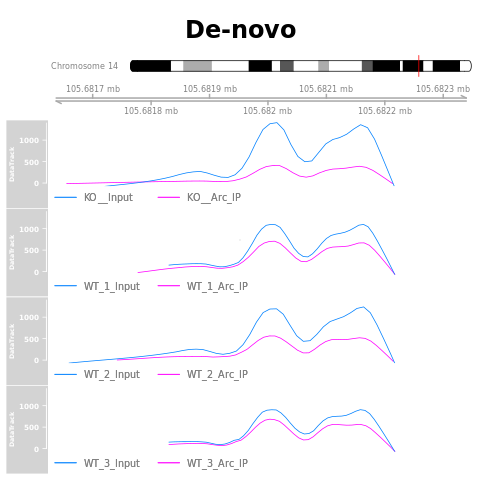

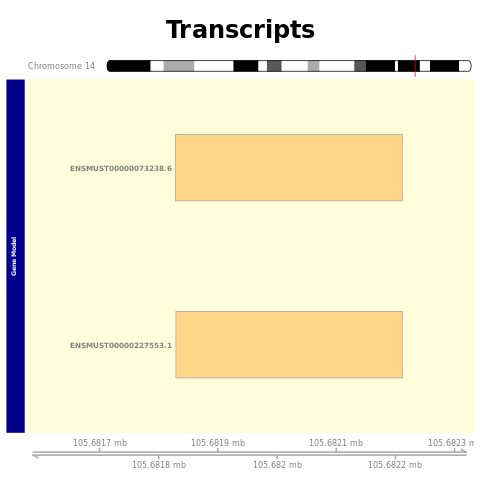

In [108]:
%%R
all_loci_plots (3, 150, 80, Z_out = 100, y_lim = c(0,1400))

[1] "The top de-novo gene:"
                 Chr Strand Width log2FoldChange  P.value
gene.12592.470 chr15      +  2953       4.465532 4.36e-39
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000023268.13" "ENSMUST00000110009.3" 


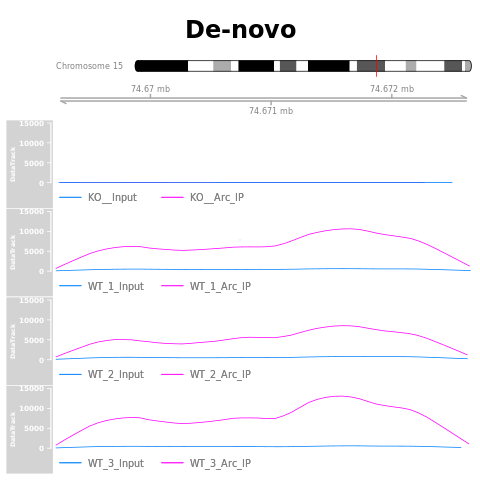

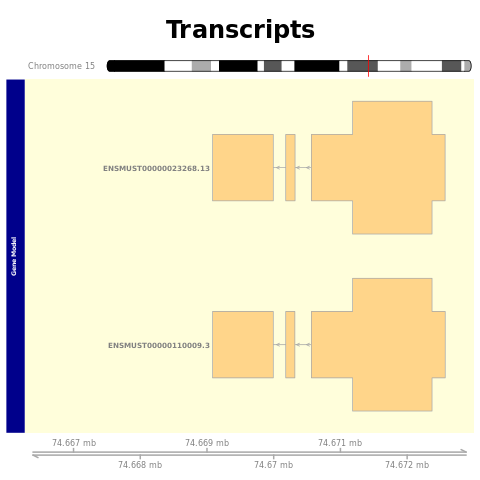

In [109]:
%%R
all_loci_plots (4, 3e3, 4e2, Z_out = 100, y_lim = c(-100,15e3))

[1] "The top de-novo gene:"
                  Chr Strand Width log2FoldChange  P.value
gene.12594.1109 chr15      -  5684       4.382074 1.30e-39
[1] "mm10 overlap transcript:"
[1] "ENSMUST00000023268.13" "ENSMUST00000110009.3" 


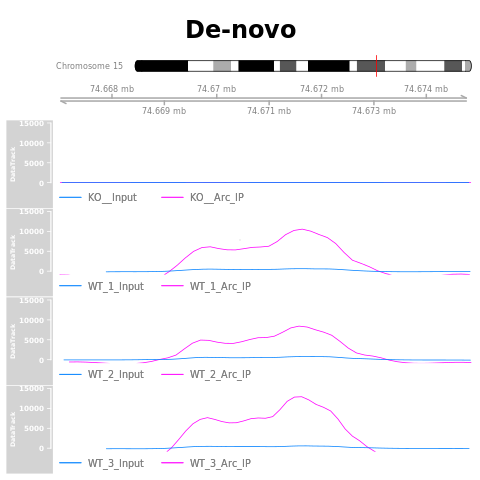

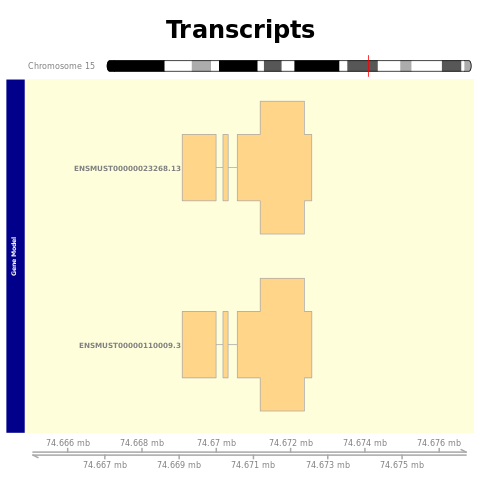

In [110]:
%%R
all_loci_plots (5, 3e3, 3e3, Z_out = 1e3, y_lim = c(-100,15e3))

In [ ]:
# %%R
# all_loci_plots (6, 13e4, 23e4, Z_out = 500, y_lim = c(0,2000))

In [ ]:
# %%R
# all_loci_plots (7, 14e4, 10e4, Z_out = 500, y_lim = c(0,100)) 

In [ ]:
# %%R
# all_loci_plots (8, 3.5e4, 1.8e4) # , Z_out = 100) # , y_lim = c(0,100))

In [ ]:
# %%R
# all_loci_plots (9, 2e4, 1.8e4, Z_out = 100, y_lim = c(0,60))

In [ ]:
# %%R
# all_loci_plots (10, 2.5e3, 1.5e3, Z_out = 100, y_lim = c(-2,9))